In [15]:
import numpy as np 
import os
import pandas as pd 
import matplotlib.pyplot as plt 

#Importation des bibliothèques pour de la modélisation 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

 
import kagglehub

import seaborn as sns
from scipy.stats import linregress

In [16]:
# Download the dataset and get the path to the directory
data_dir = kagglehub.dataset_download("purohitgaurav/plastic-based-textiles-in-clothing-industry")

# List the files in the downloaded directory to ensure the correct path
print("Downloaded files:", os.listdir(data_dir))

# Adjust this based on the actual filename inside the directory
csv_file = "Plastic based Textiles in clothing industry.csv"
file_path = os.path.join(data_dir, csv_file)

Downloaded files: ['Plastic based Textiles in clothing industry.csv']


In [17]:
## Premières esquisses
df = pd.read_csv(file_path)
df.shape
df.columns
df.head()
df.dropna()
df.reset_index(drop=True, inplace=True)  # Réinitialise l'index à 0
df.index = df.index + 1 
df.head()

,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
1,Zara,Polyester,2020,5000,20,7500,1200,300,500000
2,Zara,Nylon,2019,3000,15,5000,900,200,450000
3,Zara,Recycled_Poly,2021,3500,18,6000,1100,250,480000
4,Zara,Cotton,2018,2000,10,4500,800,180,550000
5,Zara,Synthetic_Blend,2022,6000,25,8000,1500,350,600000


In [18]:
# Conversion des années en format "DateTime" + réorganisation du df
df['Production_Year'] = pd.to_datetime(df['Production_Year'], format='%Y')
df.head()
df_sorted = df.sort_values(by='Production_Year')


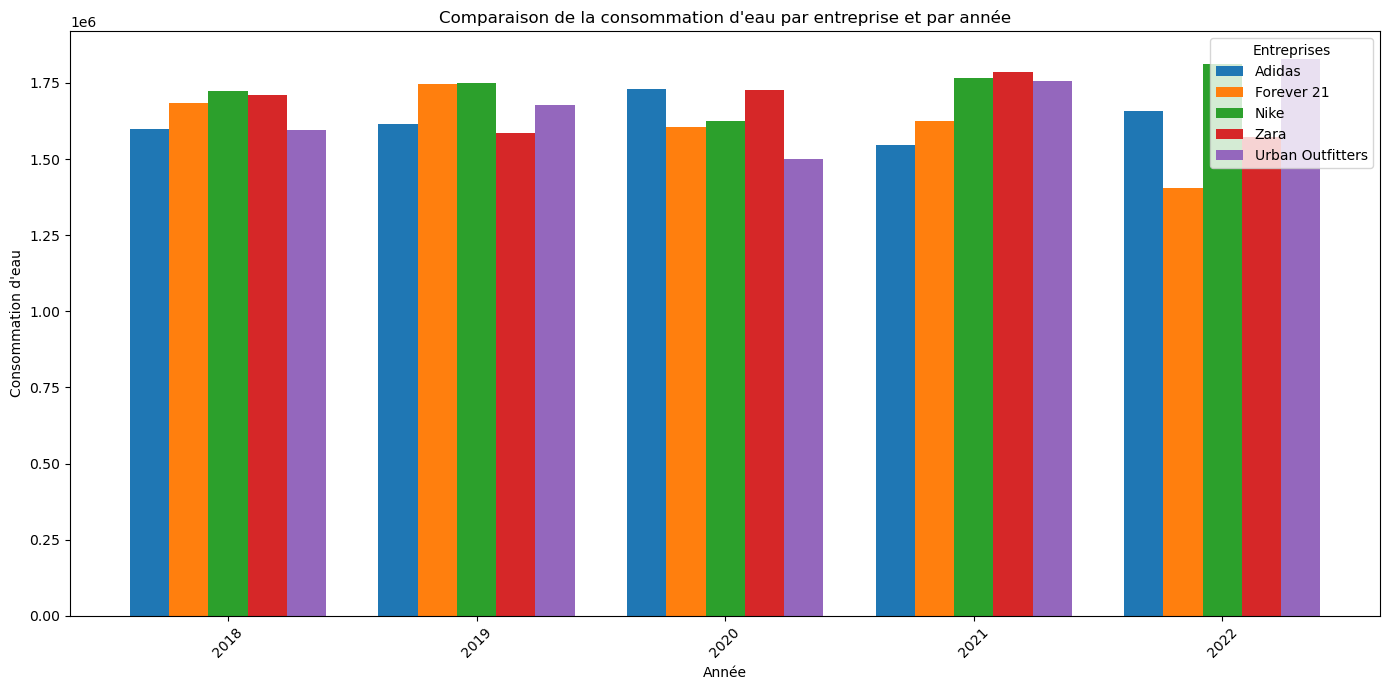

In [19]:
# Extraire les années et les entreprises uniques
years = sorted(df_sorted['Production_Year'].dt.year.unique())
companies = df_sorted['Company'].unique()

# Largeur des barres et indices pour chaque groupe d'entreprises par année
bar_width = 0.15
space_between_years = 0.2
x = np.arange(len(years)) * (len(companies) * bar_width + space_between_years)

# Tracer les barres pour chaque entreprise avec espace entre les années
plt.figure(figsize=(14, 7))

for i, company in enumerate(companies):
    # Filtrer les données de l'entreprise et agréger la consommation d'eau par année
    company_data = df_sorted[df_sorted['Company'] == company].groupby(df_sorted['Production_Year'].dt.year)['Water_Consumption'].sum()
    
    # Décaler les barres de chaque entreprise dans le groupe d'années
    plt.bar(x + i * bar_width, company_data.reindex(years, fill_value=0), 
            width=bar_width, label=company)

# Ajouter des étiquettes et un titre
plt.title("Comparaison de la consommation d'eau par entreprise et par année")
plt.xlabel("Année")
plt.ylabel("Consommation d'eau")
plt.xticks(x + bar_width * (len(companies) - 1) / 2, years, rotation=45)
plt.legend(title='Entreprises')
plt.tight_layout()
plt.show()

On cherche à comparer ces résultats à l'évolution globale de la consommation d'eau des entreprises dans l'industrie de la mode, on utilise pour cela la base de donnée sustainable_fashion_trends_2024

In [20]:
df_sorted = pd.read_csv('sustainable_fashion_trends_2024.csv')
df_sorted.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


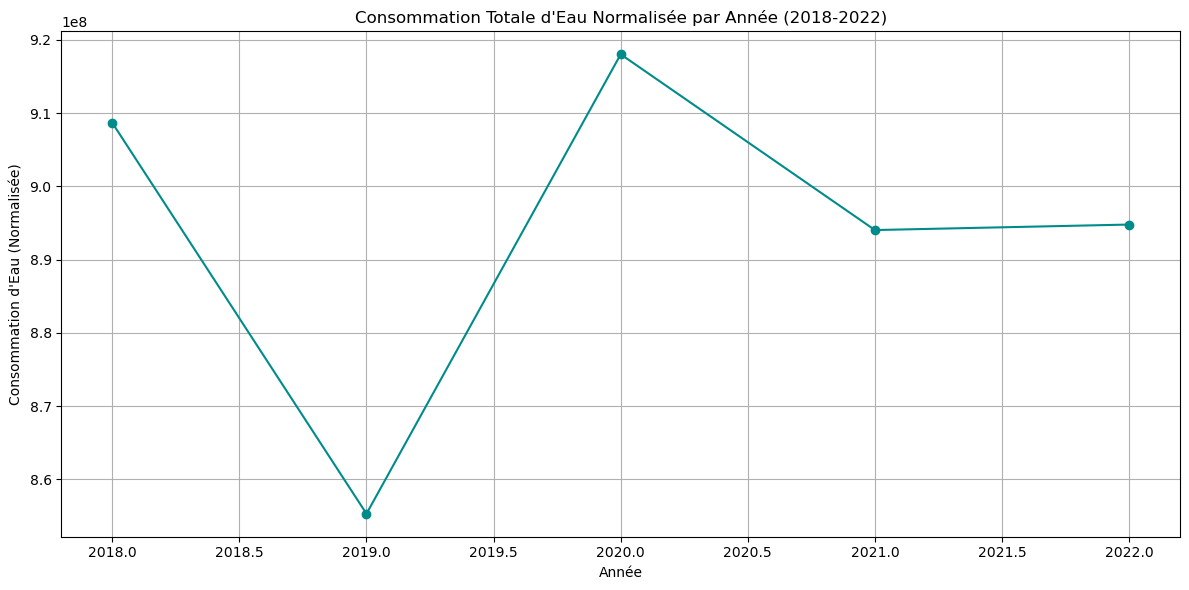

In [22]:
# Compter le nombre de données disponibles chaque année
data_count_per_year = df_sorted['Year'].value_counts().sort_index()

# Calculer la consommation totale d'eau par année
total_water_consumption_per_year = df_sorted.groupby('Year')['Water_Usage_Liters'].sum()

# Normaliser la consommation d'eau totale par le nombre de données de chaque année
base_year = data_count_per_year.max()
normalized_water_consumption = (total_water_consumption_per_year / data_count_per_year) * base_year

# Filtrer pour les années 2018 à 2022 uniquement
years_to_display = [2018, 2019, 2020, 2021, 2022]
normalized_water_consumption = normalized_water_consumption[normalized_water_consumption.index.isin(years_to_display)]

# Tracer le graphique de la consommation d'eau normalisée
plt.figure(figsize=(12, 6))
normalized_water_consumption.plot(kind='line', marker='o', color='darkcyan')

plt.title('Consommation Totale d\'Eau Normalisée par Année (2018-2022)')
plt.xlabel('Année')
plt.ylabel('Consommation d\'Eau (Normalisée)')
plt.grid(True)
plt.tight_layout()
plt.show()
